# 1. 编码器-解码器架构

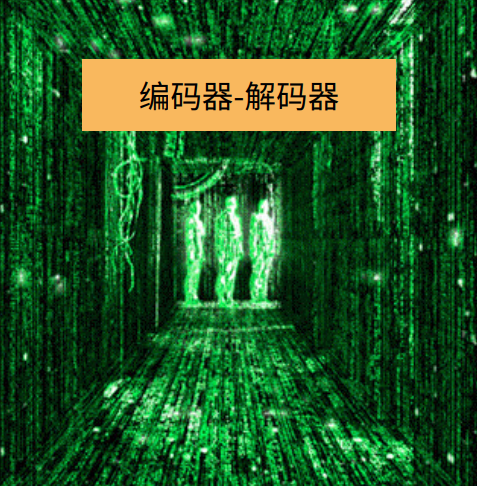

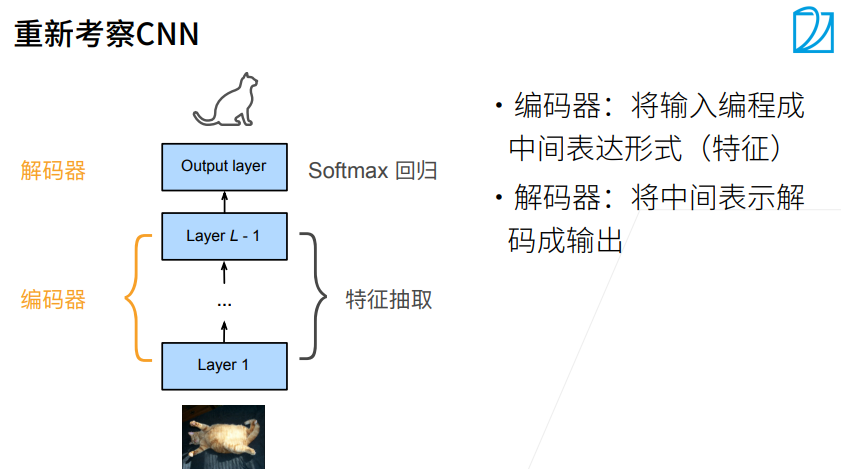

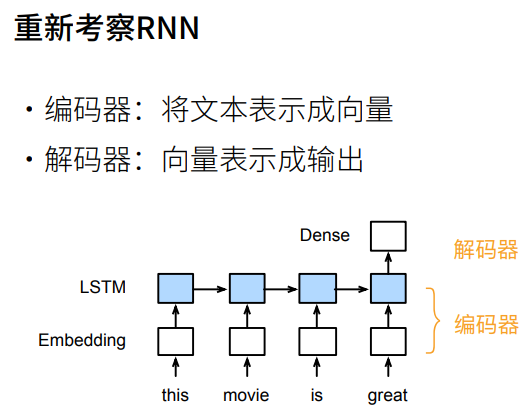

① 编码器处理输入，解码器生成输出。

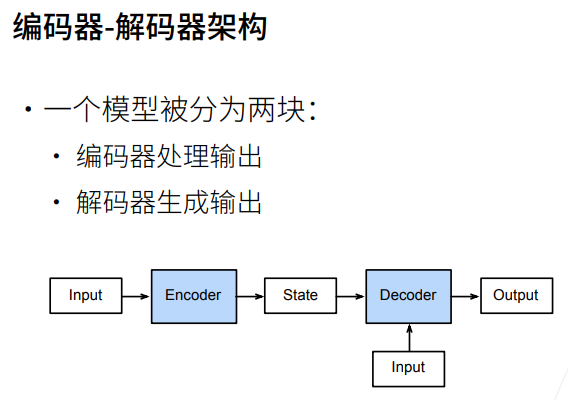

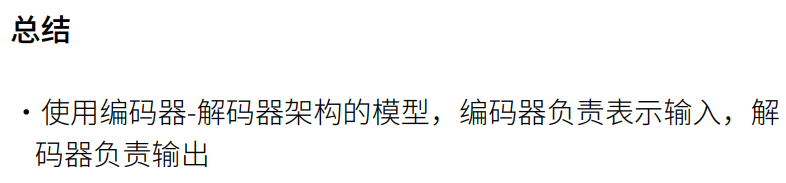

# 2. 编码器-解码器架构

In [1]:
# 编码器
from torch import nn

class Encoder(nn.Module):
    """编码器-解码器结构的基本编码器接口"""
    #  Encoder 类的构造函数，它接受任意数量的关键字参数
    def __init__(self, **kwargs):
        # 调用了父类 nn.Module 的构造函数，确保正确初始化
        super(Encoder, self).__init__(**kwargs)
    
    def forward(self, X, *args):
        # 抛出一个 NotImplementedError 异常，表示该方法需要在子类中进行实现。
        raise NotImplementedError

In [2]:
# 解码器
class Decoder(nn.Module):
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)
            
    def init_state(self, enc_outputs, *args): # 拿到编码器的输出enc_outputs
        raise NotImplementedError
        
    def forward(self, X, state): # 拿到额外的输出X, state是用来不断更新的
        raise NotImplementedError

In [3]:
# 合并编码器和解码器
class EncoderDecoder(nn.Module):
    """编码器-解码器结构的基类"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        # 将传入的编码器实例赋值给类的 encoder 属性
        self.encoder = encoder
        # 将传入的解码器实例赋值给类的 decoder 属性
        self.decoder = decoder
        
    def forward(self, enc_X, dec_X, *args):
        # 使用编码器对输入进行编码
        enc_outputs = self.encoder(enc_X, *args)
        # 使用编码器的输出初始化解码器的状态
        dec_state = self.decoder.init_state(enc_outputs, *args)  
        # 使用解码器进行解码
        return self.decoder(dec_X, dec_state)